<a href="https://colab.research.google.com/github/pradhanyars/Stroke_Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**UPLOADING DATASET**

In [ ]:
df = pd.read_csv("/content/Brain_Stroke_Prediction.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Find the number of NULL values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

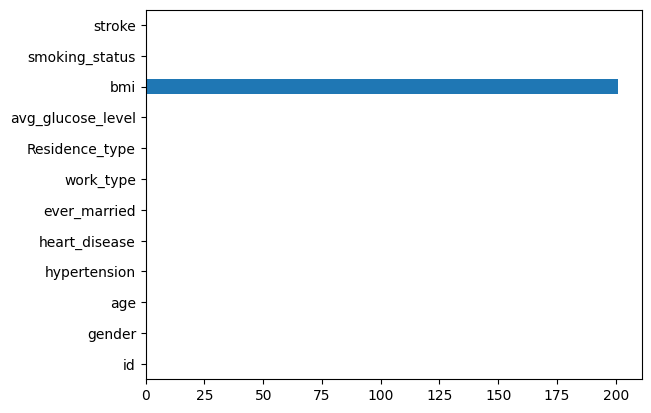

In [ ]:
print(df.isna().sum())
df.isna().sum().plot.barh()

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df = df.drop(['id'],axis=1)


In [ ]:
df.shape

(5110, 11)

**GENDER ANALYSIS**

In [ ]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

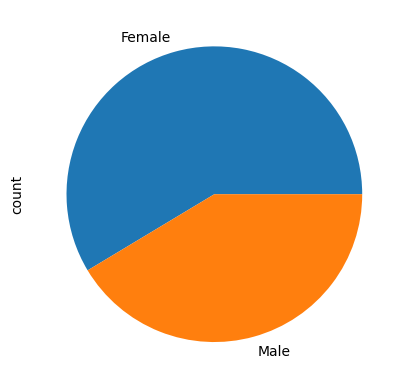

In [ ]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")

In [ ]:
df['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

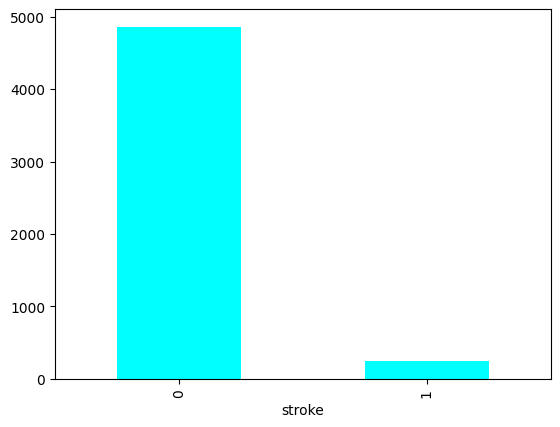

In [ ]:
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [ ]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


<Axes: xlabel='hypertension'>

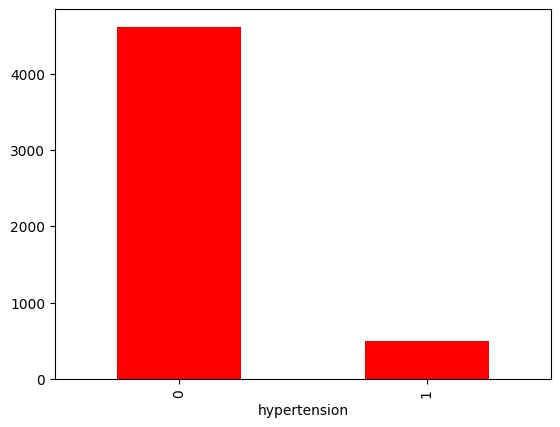

In [ ]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

In [ ]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

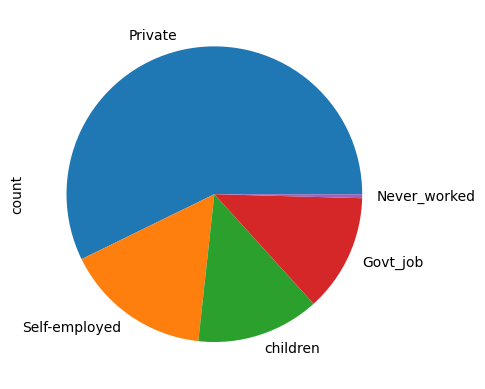

In [ ]:
df['work_type'].value_counts().plot(kind="pie")

In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

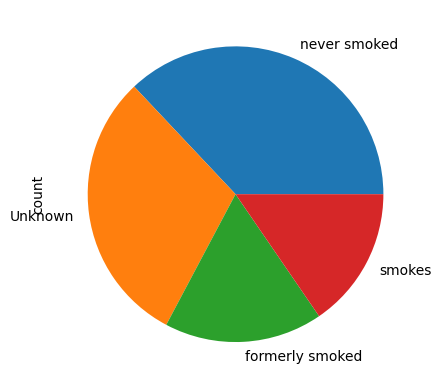

In [ ]:
df['smoking_status'].value_counts().plot(kind="pie")

In [ ]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

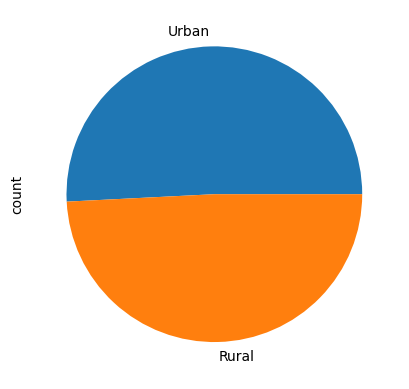

In [ ]:
df['Residence_type'].value_counts().plot(kind="pie")

In [ ]:
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

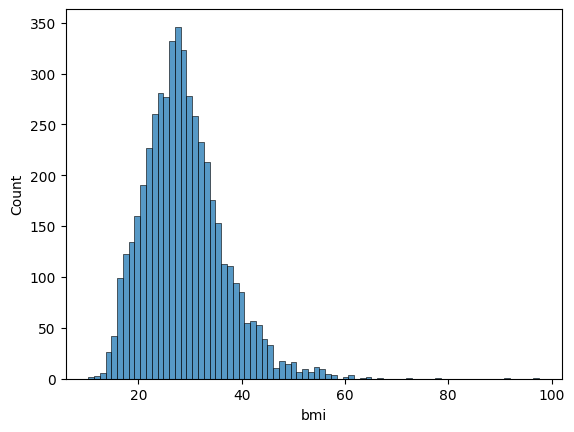

In [ ]:
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

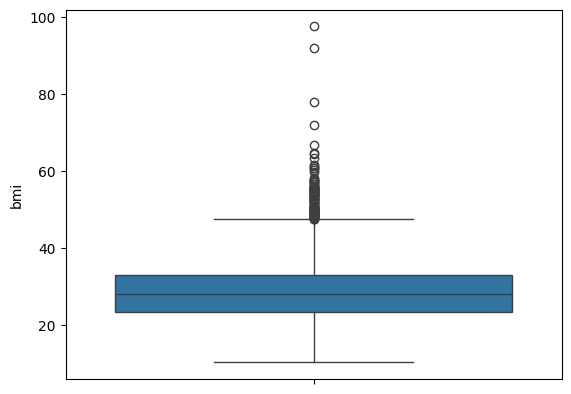

In [ ]:
sns.boxplot(data=df['bmi'])

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

In [ ]:
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [ ]:
df['stroke'].sum()/len(df)*100

4.87279843444227

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [ ]:
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<Axes: xlabel='age', ylabel='Count'>

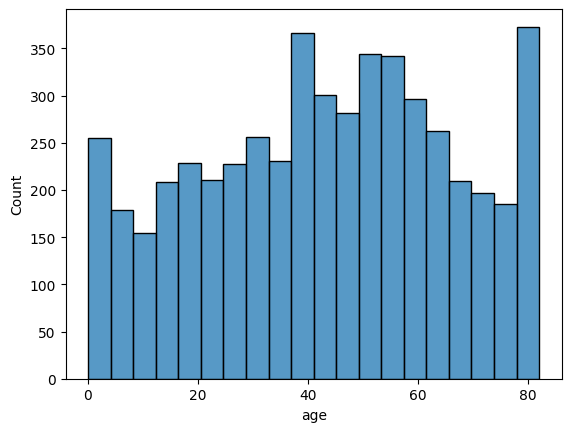

In [ ]:
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

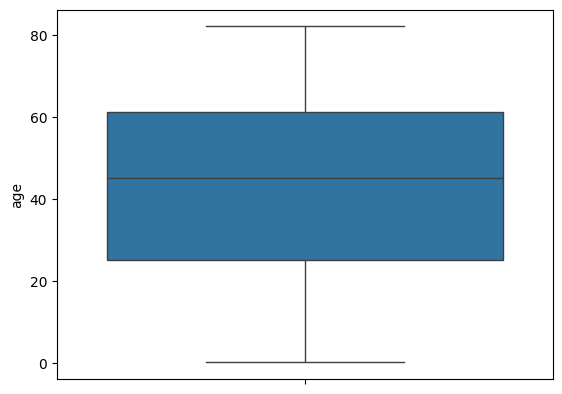

In [ ]:
sns.boxplot(data=df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

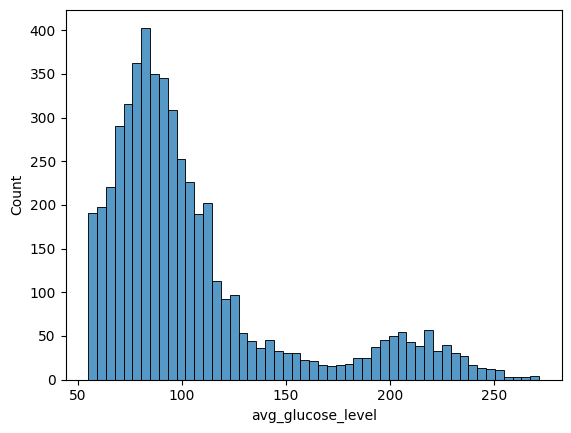

In [ ]:
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

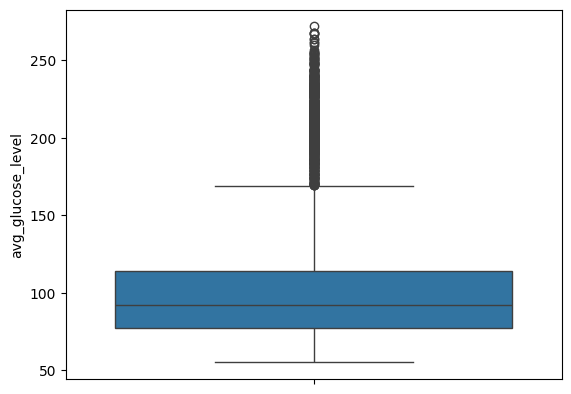

In [ ]:
sns.boxplot(data=df['avg_glucose_level'])

In [ ]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

<Axes: >

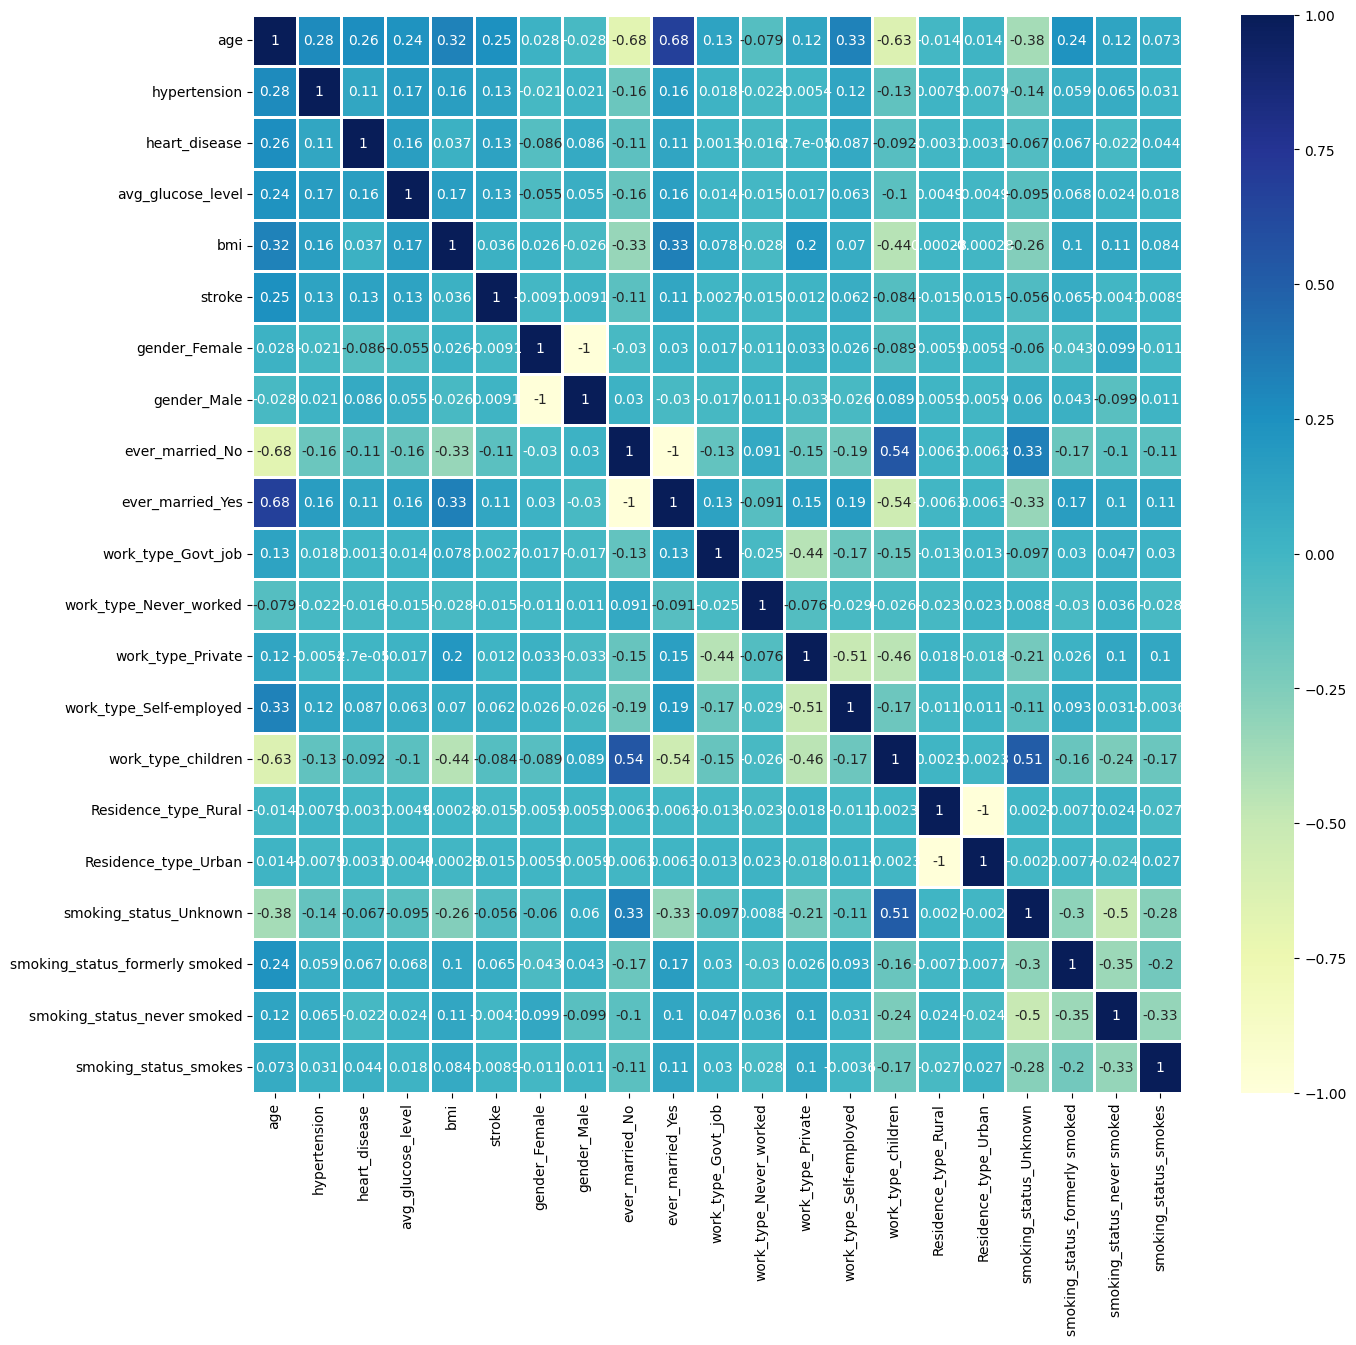

In [ ]:
df_encoded = pd.get_dummies(df)
corrmat = df_encoded.corr()
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidth=0.8, annot=True)


In [ ]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: ylabel='count'>

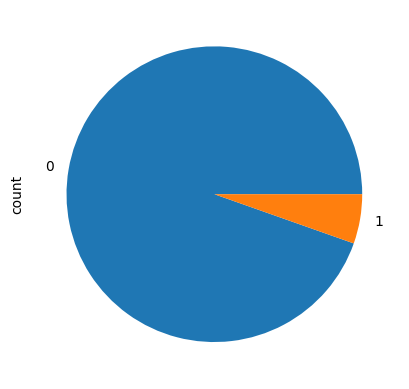

In [ ]:
df['heart_disease'].value_counts().plot(kind="pie")

In [ ]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: ylabel='count'>

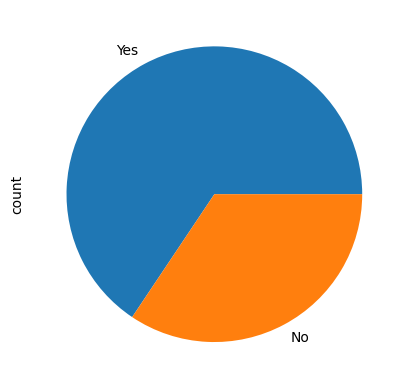

In [ ]:
df['ever_married'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke', ylabel='count'>

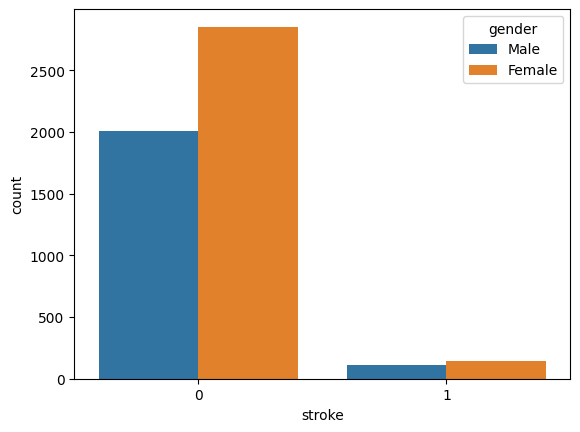

In [ ]:
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

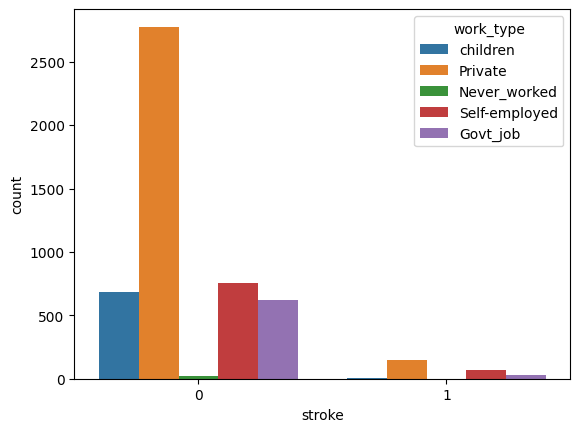

In [ ]:
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

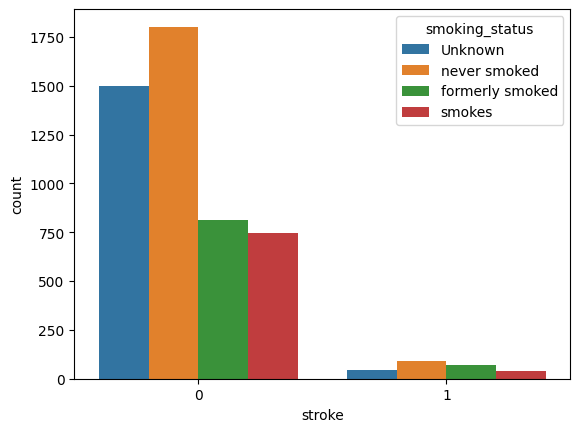

In [ ]:
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

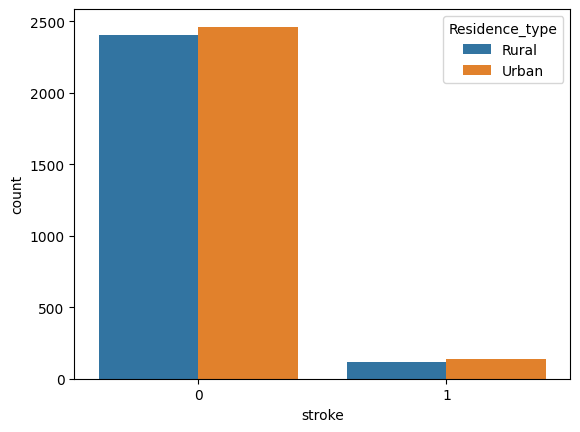

In [ ]:
sns.countplot(x='stroke', hue='Residence_type', data=df)


<Axes: xlabel='stroke', ylabel='count'>

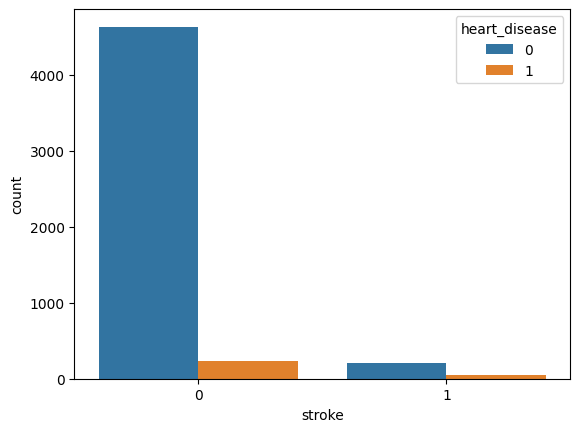

In [ ]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

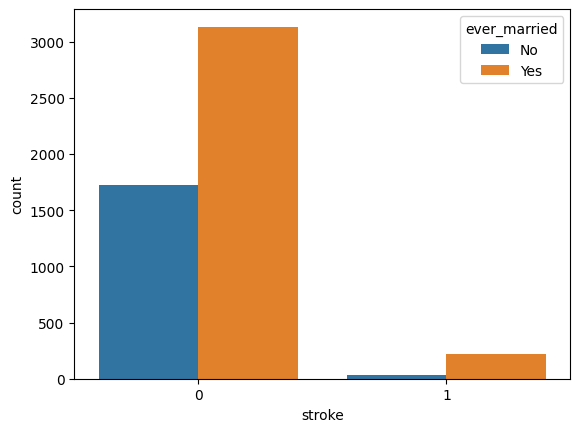

In [ ]:
sns.countplot(x='stroke', hue='ever_married', data=df)

In [ ]:
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
df = pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

### Creating test-train split (80-20 split)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


**TRAINING MODEL**

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9784061696658097
Precision: 0.958498023715415
Recall: 1.0
F1-score: 0.9788092835519677


**HYPERPARAMETER FOR DECISION TREE**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30,50,60,80],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'auto', 'sqrt']
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=3, verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print("Grid Search - Best Parameters for Decision Tree:", grid_search_dt.best_params_)
best_dt_clf_grid = grid_search_dt.best_estimator_
y_pred_best_dt_grid = best_dt_clf_grid.predict(X_test)
accuracy_dt_grid = accuracy_score(y_test, y_pred_best_dt_grid)
print('Grid Search - Accuracy for Decision Tree:', accuracy_dt_grid)
precision_dt_grid = precision_score(y_test, y_pred_best_dt_grid)
recall_dt_grid = recall_score(y_test, y_pred_best_dt_grid)
f1_dt_grid = f1_score(y_test, y_pred_best_dt_grid)
print("Grid Search - Precision for Decision Tree:", precision_dt_grid)
print("Grid Search - Recall for Decision Tree:", recall_dt_grid)
print("Grid Search - F1-score for Decision Tree:", f1_dt_grid)
conf_matrix_dt_grid = confusion_matrix(y_test, y_pred_best_dt_grid)
print("Grid Search - Confusion Matrix for Decision Tree:")
print(conf_matrix_dt_grid)
dt_random = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_grid_dt, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
dt_random.fit(X_train, y_train)
print("Random Search - Best Parameters for Decision Tree:", dt_random.best_params_)
best_dt_clf_random = dt_random.best_estimator_
y_pred_best_dt_random = best_dt_clf_random.predict(X_test)
accuracy_dt_random = accuracy_score(y_test, y_pred_best_dt_random)
print('Random Search - Accuracy for Decision Tree:', accuracy_dt_random)
precision_dt_random = precision_score(y_test, y_pred_best_dt_random)
recall_dt_random = recall_score(y_test, y_pred_best_dt_random)
f1_dt_random = f1_score(y_test, y_pred_best_dt_random)
print("Random Search - Precision for Decision Tree:", precision_dt_random)
print("Random Search - Recall for Decision Tree:", recall_dt_random)
print("Random Search - F1-score for Decision Tree:", f1_dt_random)
conf_matrix_dt_random = confusion_matrix(y_test, y_pred_best_dt_random)
print("Random Search - Confusion Matrix for Decision Tree:")
print(conf_matrix_dt_random)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits
Grid Search - Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Grid Search - Accuracy for Decision Tree: 0.974293059125964
Grid Search - Precision for Decision Tree: 0.9509803921568627
Grid Search - Recall for Decision Tree: 1.0
Grid Search - F1-score for Decision Tree: 0.9748743718592965
Grid Search - Confusion Matrix for Decision Tree:
[[925  50]
 [  0 970]]
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Search - Best Parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Random Search - Accuracy for Decision Tree: 0.9763496143958869
Random Search - Precision for Decision Tree: 0.9547244094488189
Random Search - Recall for Decision Tree: 1.0
Random Search - F1-score for Decision Tree: 

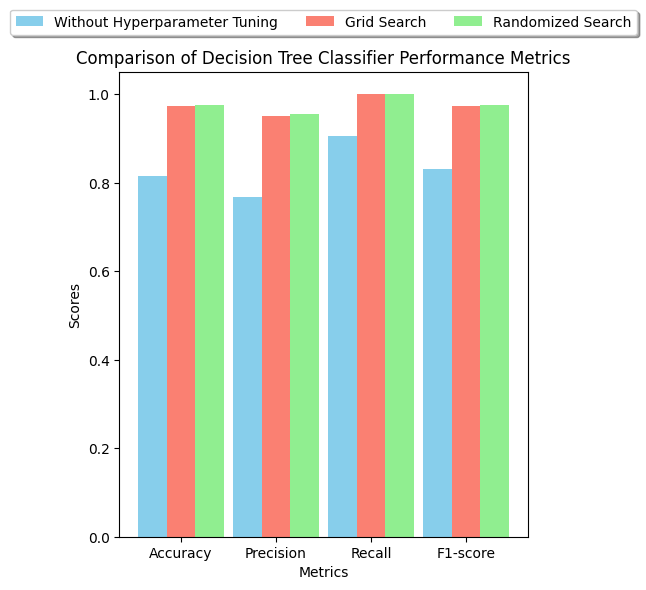

In [ ]:
import matplotlib.pyplot as plt

# Data
dt_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}
grid_metrics_dt = {
    'Accuracy': accuracy_dt_grid,
    'Precision': precision_dt_grid,
    'Recall': recall_dt_grid,
    'F1-score': f1_dt_grid
}
random_metrics_dt = {
    'Accuracy': accuracy_dt_random,
    'Precision': precision_dt_random,
    'Recall': recall_dt_random,
    'F1-score': f1_dt_random
}

# Plot settings
labels = list(dt_metrics.keys())
x = range(len(labels))
plt.figure(figsize=(6, 6))
bar_width = 0.30

# Title
plt.title('Comparison of Decision Tree Classifier Performance Metrics')

# Bar chart
plt.bar(x, list(dt_metrics.values()), width=bar_width, label='Without Hyperparameter Tuning', color='skyblue', align='center')
plt.bar([i + bar_width for i in x], list(grid_metrics_dt.values()), width=bar_width, label='Grid Search', color='salmon', align='center')
plt.bar([i + 2*bar_width for i in x], list(random_metrics_dt.values()), width=bar_width, label='Randomized Search', color='lightgreen', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks([i + bar_width for i in x], labels)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show()


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:
[[921  54]
 [  0 970]]
Accuracy: 0.9722365038560411
Precision: 0.947265625
Recall: 1.0
F1-score: 0.9729187562688064


**HYPERPARAMETER FOR KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7,50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=3, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print("Grid Search - Best Parameters for KNN:", grid_search_knn.best_params_)
best_knn_clf_grid = grid_search_knn.best_estimator_
y_pred_best_knn_grid = best_knn_clf_grid.predict(X_test)
accuracy_knn_grid = accuracy_score(y_test, y_pred_best_knn_grid)
print('Grid Search - Accuracy for KNN:', accuracy_knn_grid)
precision_knn_grid = precision_score(y_test, y_pred_best_knn_grid)
recall_knn_grid = recall_score(y_test, y_pred_best_knn_grid)
f1_knn_grid = f1_score(y_test, y_pred_best_knn_grid)
print("Grid Search - Precision for KNN:", precision_knn_grid)
print("Grid Search - Recall for KNN:", recall_knn_grid)
print("Grid Search - F1-score for KNN:", f1_knn_grid)
conf_matrix_knn_grid = confusion_matrix(y_test, y_pred_best_knn_grid)
print("Grid Search - Confusion Matrix for KNN:")
print(conf_matrix_knn_grid)
knn_random = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
knn_random.fit(X_train, y_train)
print("Random Search - Best Parameters for KNN:", knn_random.best_params_)
best_knn_clf_random = knn_random.best_estimator_
y_pred_best_knn_random = best_knn_clf_random.predict(X_test)
accuracy_knn_random = accuracy_score(y_test, y_pred_best_knn_random)
print('Random Search - Accuracy for KNN:', accuracy_knn_random)
precision_knn_random = precision_score(y_test, y_pred_best_knn_random)
recall_knn_random = recall_score(y_test, y_pred_best_knn_random)
f1_knn_random = f1_score(y_test, y_pred_best_knn_random)
print("Random Search - Precision for KNN:", precision_knn_random)
print("Random Search - Recall for KNN:", recall_knn_random)
print("Random Search - F1-score for KNN:", f1_knn_random)
conf_matrix_knn_random = confusion_matrix(y_test, y_pred_best_knn_random)
print("Random Search - Confusion Matrix for KNN:")
print(conf_matrix_knn_random)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Grid Search - Best Parameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Grid Search - Accuracy for KNN: 0.9568123393316196
Grid Search - Precision for KNN: 0.920303605313093
Grid Search - Recall for KNN: 1.0
Grid Search - F1-score for KNN: 0.9584980237154149
Grid Search - Confusion Matrix for KNN:
[[891  84]
 [  0 970]]
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Search - Best Parameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'leaf_size': 30, 'algorithm': 'kd_tree'}
Random Search - Accuracy for KNN: 0.9568123393316196
Random Search - Precision for KNN: 0.920303605313093
Random Search - Recall for KNN: 1.0
Random Search - F1-score for KNN: 0.9584980237154149
Random Search - Confusion Matrix for KNN:
[[891  84]
 [  0 970]]


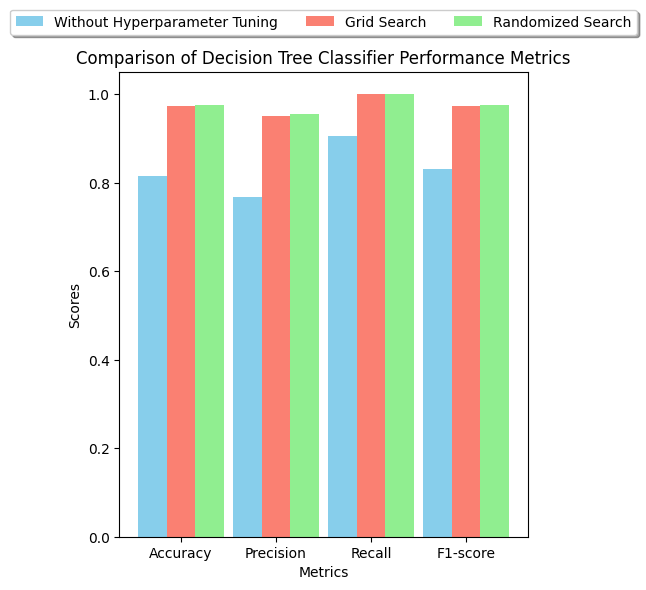

In [ ]:
import matplotlib.pyplot as plt

# Data for Decision Tree
dt_metrics_without_tuning = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

dt_metrics_with_grid_search = {
    'Accuracy': accuracy_dt_grid,
    'Precision': precision_dt_grid,
    'Recall': recall_dt_grid,
    'F1-score': f1_dt_grid
}

dt_metrics_with_random_search = {
    'Accuracy': accuracy_dt_random,
    'Precision': precision_dt_random,
    'Recall': recall_dt_random,
    'F1-score': f1_dt_random
}

# Plot settings
labels = list(dt_metrics_without_tuning.keys())
x = range(len(labels))
plt.figure(figsize=(6, 6))
bar_width = 0.30

# Title
plt.title('Comparison of Decision Tree Classifier Performance Metrics')

# Bar chart
plt.bar(x, list(dt_metrics_without_tuning.values()), width=bar_width, label='Without Hyperparameter Tuning', color='skyblue', align='center')
plt.bar([i + bar_width for i in x], list(dt_metrics_with_grid_search.values()), width=bar_width, label='Grid Search', color='salmon', align='center')
plt.bar([i + 2*bar_width for i in x], list(dt_metrics_with_random_search.values()), width=bar_width, label='Randomized Search', color='lightgreen', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks([i + bar_width for i in x], labels)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show()


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9933161953727506
Precision: 0.9867751780264497
Recall: 1.0
F1-score: 0.9933435739887352
Confusion Matrix:
[[962  13]
 [  0 970]]


**HYPERPARAMETER FOR RANDOM FOREST**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Grid Search - Best Parameters:", grid_search.best_params_)
best_rf_clf_grid = grid_search.best_estimator_
y_pred_best_rf_grid = best_rf_clf_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_best_rf_grid)
print('Grid Search - Accuracy:', accuracy_grid)
precision_grid = precision_score(y_test, y_pred_best_rf_grid)
recall_grid = recall_score(y_test, y_pred_best_rf_grid)
f1_grid = f1_score(y_test, y_pred_best_rf_grid)
print("Grid Search - Precision:", precision_grid)
print("Grid Search - Recall:", recall_grid)
print("Grid Search - F1-score:", f1_grid)
conf_matrix_grid = confusion_matrix(y_test, y_pred_best_rf_grid)
print("Grid Search - Confusion Matrix:")
print(conf_matrix_grid)
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Random Search - Best Parameters:", rf_random.best_params_)
best_rf_clf_random = rf_random.best_estimator_
y_pred_best_rf_random = best_rf_clf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_best_rf_random)
print('Random Search - Accuracy:', accuracy_random)
precision_random = precision_score(y_test, y_pred_best_rf_random)
recall_random = recall_score(y_test, y_pred_best_rf_random)
f1_random = f1_score(y_test, y_pred_best_rf_random)
print("Random Search - Precision:", precision_random)
print("Random Search - Recall:", recall_random)
print("Random Search - F1-score:", f1_random)
conf_matrix_random = confusion_matrix(y_test, y_pred_best_rf_random)
print("Random Search - Confusion Matrix:")
print(conf_matrix_random)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Grid Search - Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Grid Search - Accuracy: 0.9979434447300771
Grid Search - Precision: 0.9958932238193019
Grid Search - Recall: 1.0
Grid Search - F1-score: 0.9979423868312758
Grid Search - Confusion Matrix:
[[971   4]
 [  0 970]]
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Search - Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Random Search - Accuracy: 0.9974293059125964
Random Search - Precision: 0.9948717948717949
Random Search - Recall: 1.0
Random Search - F1-score: 0.9974293059125964
Random Search - Confusion Matrix:
[[970   5]
 [  0 970]]


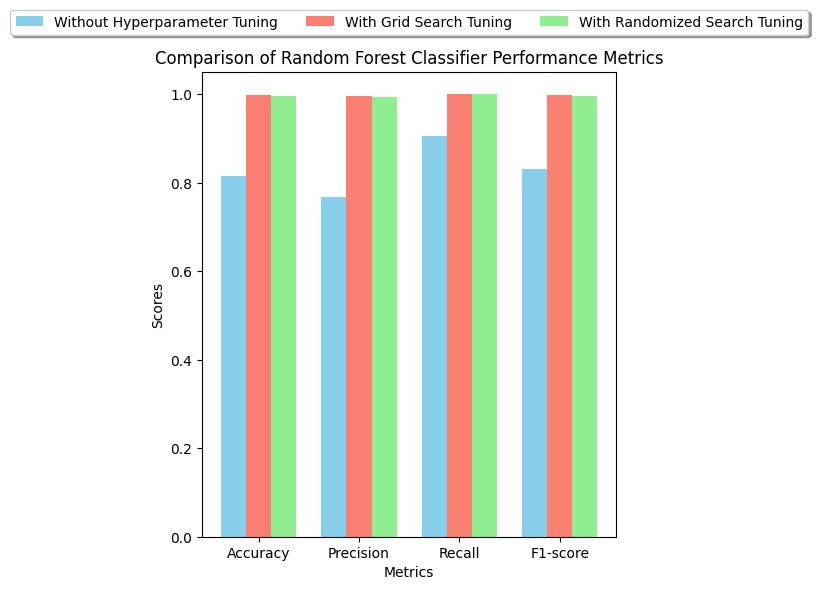

In [ ]:
import matplotlib.pyplot as plt

# Data
rf_metrics_without_tuning = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

rf_metrics_with_grid_search = {
    'Accuracy': accuracy_grid,
    'Precision': precision_grid,
    'Recall': recall_grid,
    'F1-score': f1_grid
}

rf_metrics_with_random_search = {
    'Accuracy': accuracy_random,
    'Precision': precision_random,
    'Recall': recall_random,
    'F1-score': f1_random
}

# Plot settings
labels = list(rf_metrics_without_tuning.keys())
x = range(len(labels))
plt.figure(figsize=(7, 6))
bar_width = 0.25

# Title
plt.title('Comparison of Random Forest Classifier Performance Metrics')

# Bar chart for Random Forest without tuning
plt.bar(x, list(rf_metrics_without_tuning.values()), width=bar_width, label='Without Hyperparameter Tuning', color='skyblue', align='center')

# Bar chart for Random Forest with grid search tuning
plt.bar([i + bar_width for i in x], list(rf_metrics_with_grid_search.values()), width=bar_width, label='With Grid Search Tuning', color='salmon', align='center')

# Bar chart for Random Forest with randomized search tuning
plt.bar([i + 2*bar_width for i in x], list(rf_metrics_with_random_search.values()), width=bar_width, label='With Randomized Search Tuning', color='lightgreen', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks([i + bar_width for i in x], labels)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show()


**NAIVE BAYES CLASSIFIERS**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6735218508997429
Precision: 0.6059456040480709
Recall: 0.9876288659793815
F1-score: 0.751078008624069


**HYPERPARAMETER FOR NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
}
nb_grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=3, verbose=2, n_jobs=-1)
nb_grid_search.fit(X_train, y_train)
print("Grid Search - Best Parameters for Naive Bayes:", nb_grid_search.best_params_)
best_nb_clf_grid = nb_grid_search.best_estimator_
y_pred_best_nb_grid = best_nb_clf_grid.predict(X_test)
accuracy_nb_grid = accuracy_score(y_test, y_pred_best_nb_grid)
precision_nb_grid = precision_score(y_test, y_pred_best_nb_grid)
recall_nb_grid = recall_score(y_test, y_pred_best_nb_grid)
f1_nb_grid = f1_score(y_test, y_pred_best_nb_grid)
print('Grid Search - Accuracy for Naive Bayes:', accuracy_nb_grid)
print('Grid Search - Precision for Naive Bayes:', precision_nb_grid)
print('Grid Search - Recall for Naive Bayes:', recall_nb_grid)
print('Grid Search - F1-score for Naive Bayes:', f1_nb_grid)
conf_matrix_nb_grid = confusion_matrix(y_test, y_pred_best_nb_grid)
print("Grid Search - Confusion Matrix for Naive Bayes:")
print(conf_matrix_nb_grid)
nb_random_search = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
nb_random_search.fit(X_train, y_train)
print("Random Search - Best Parameters for Naive Bayes:", nb_random_search.best_params_)
best_nb_clf_random = nb_random_search.best_estimator_
y_pred_best_nb_random = best_nb_clf_random.predict(X_test)
accuracy_nb_random = accuracy_score(y_test, y_pred_best_nb_random)
precision_nb_random = precision_score(y_test, y_pred_best_nb_random)
recall_nb_random = recall_score(y_test, y_pred_best_nb_random)
f1_nb_random = f1_score(y_test, y_pred_best_nb_random)
print('Random Search - Accuracy for Naive Bayes:', accuracy_nb_random)
print('Random Search - Precision for Naive Bayes:', precision_nb_random)
print('Random Search - Recall for Naive Bayes:', recall_nb_random)
print('Random Search - F1-score for Naive Bayes:', f1_nb_random)
conf_matrix_nb_random = confusion_matrix(y_test, y_pred_best_nb_random)
print("Random Search - Confusion Matrix for Naive Bayes:")
print(conf_matrix_nb_random)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Grid Search - Best Parameters for Naive Bayes: {'priors': None, 'var_smoothing': 1e-05}
Grid Search - Accuracy for Naive Bayes: 0.7496143958868895
Grid Search - Precision for Naive Bayes: 0.705531914893617
Grid Search - Recall for Naive Bayes: 0.8546391752577319
Grid Search - F1-score for Naive Bayes: 0.7729603729603729
Grid Search - Confusion Matrix for Naive Bayes:
[[629 346]
 [141 829]]
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Search - Best Parameters for Naive Bayes: {'var_smoothing': 1e-05, 'priors': [0.4, 0.6]}
Random Search - Accuracy for Naive Bayes: 0.7439588688946015
Random Search - Precision for Naive Bayes: 0.6909385113268608
Random Search - Recall for Naive Bayes: 0.8804123711340206
Random Search - F1-score for Naive Bayes: 0.7742520398912056
Random Search - Confusion Matrix for Naive Bayes:
[[593 382]
 [116 854]]


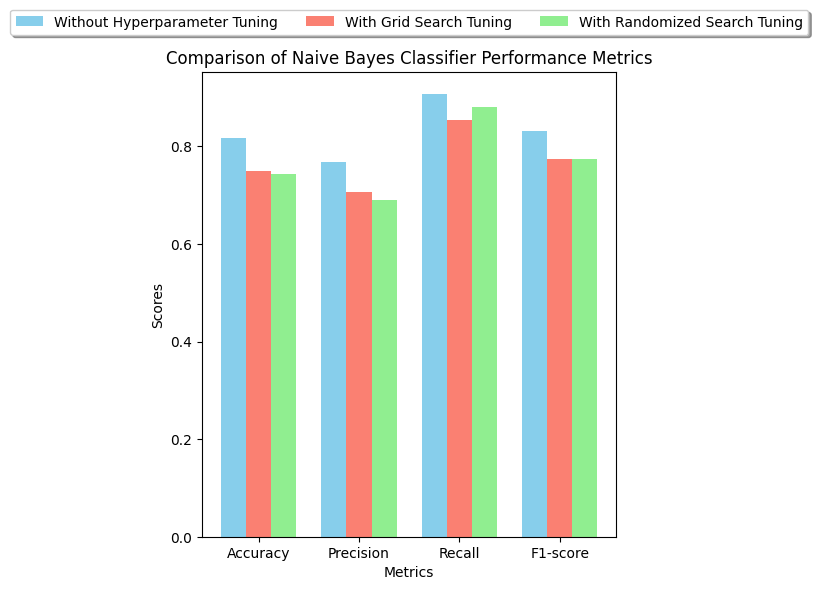

In [ ]:
import matplotlib.pyplot as plt

# Data for Naive Bayes
nb_metrics_without_tuning = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

nb_metrics_with_grid_search = {
    'Accuracy': accuracy_nb_grid,
    'Precision': precision_nb_grid,
    'Recall': recall_nb_grid,
    'F1-score': f1_nb_grid
}

nb_metrics_with_random_search = {
    'Accuracy': accuracy_nb_random,
    'Precision': precision_nb_random,
    'Recall': recall_nb_random,
    'F1-score': f1_nb_random
}

# Plot settings
labels = list(nb_metrics_without_tuning.keys())
x = range(len(labels))
plt.figure(figsize=(7, 6))
bar_width = 0.25

# Title
plt.title('Comparison of Naive Bayes Classifier Performance Metrics')

# Bar chart for Naive Bayes without tuning
plt.bar(x, list(nb_metrics_without_tuning.values()), width=bar_width, label='Without Hyperparameter Tuning', color='skyblue', align='center')

# Bar chart for Naive Bayes with grid search tuning
plt.bar([i + bar_width for i in x], list(nb_metrics_with_grid_search.values()), width=bar_width, label='With Grid Search Tuning', color='salmon', align='center')

# Bar chart for Naive Bayes with randomized search tuning
plt.bar([i + 2*bar_width for i in x], list(nb_metrics_with_random_search.values()), width=bar_width, label='With Randomized Search Tuning', color='lightgreen', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks([i + bar_width for i in x], labels)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show()


**MULTILAYER PERCEPTRON**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8164524421593831
Precision: 0.7676855895196506
Recall: 0.9061855670103093
F1-score: 0.8312056737588653
Confusion Matrix:
[[709 266]
 [ 91 879]]


**HYPERPARAMTER FOR MULTILAYER PERCEPTRON**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}
mlp_grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid_mlp, cv=3, verbose=2, n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)
print("Grid Search - Best Parameters for MLP:", mlp_grid_search.best_params_)
best_mlp_clf_grid = mlp_grid_search.best_estimator_
y_pred_best_mlp_grid = best_mlp_clf_grid.predict(X_test)
accuracy_mlp_grid = accuracy_score(y_test, y_pred_best_mlp_grid)
precision_mlp_grid = precision_score(y_test, y_pred_best_mlp_grid)
recall_mlp_grid = recall_score(y_test, y_pred_best_mlp_grid)
f1_mlp_grid = f1_score(y_test, y_pred_best_mlp_grid)
print('Grid Search - Accuracy for MLP:', accuracy_mlp_grid)
print('Grid Search - Precision for MLP:', precision_mlp_grid)
print('Grid Search - Recall for MLP:', recall_mlp_grid)
print('Grid Search - F1-score for MLP:', f1_mlp_grid)
conf_matrix_mlp_grid = confusion_matrix(y_test, y_pred_best_mlp_grid)
print("Grid Search - Confusion Matrix for MLP:")
print(conf_matrix_mlp_grid)
mlp_random_search = RandomizedSearchCV(estimator=MLPClassifier(), param_distributions=param_grid_mlp, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
mlp_random_search.fit(X_train, y_train)
print("Random Search - Best Parameters for MLP:", mlp_random_search.best_params_)
best_mlp_clf_random = mlp_random_search.best_estimator_
y_pred_best_mlp_random = best_mlp_clf_random.predict(X_test)
accuracy_mlp_random = accuracy_score(y_test, y_pred_best_mlp_random)
precision_mlp_random = precision_score(y_test, y_pred_best_mlp_random)
recall_mlp_random = recall_score(y_test, y_pred_best_mlp_random)
f1_mlp_random = f1_score(y_test, y_pred_best_mlp_random)
print('Random Search - Accuracy for MLP:', accuracy_mlp_random)
print('Random Search - Precision for MLP:', precision_mlp_random)
print('Random Search - Recall for MLP:', recall_mlp_random)
print('Random Search - F1-score for MLP:', f1_mlp_random)
conf_matrix_mlp_random = confusion_matrix(y_test, y_pred_best_mlp_random)
print("Random Search - Confusion Matrix for MLP:")
print(conf_matrix_mlp_random)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Grid Search - Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Grid Search - Accuracy for MLP: 0.9208226221079692
Grid Search - Precision for MLP: 0.8834586466165414
Grid Search - Recall for MLP: 0.9690721649484536
Grid Search - F1-score for MLP: 0.9242871189773845
Grid Search - Confusion Matrix for MLP:
[[851 124]
 [ 30 940]]
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Search - Best Parameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'tanh'}
Random Search - Accuracy for MLP: 0.834961439588689
Random Search - Precision for MLP: 0.7920792079207921
Random Search - Recall for MLP: 0.9072164948453608
Random Search - F1-score for MLP: 0.8457472369053339
Random Search - Confusion Matrix for MLP:
[[744 231]
 [ 90 880]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


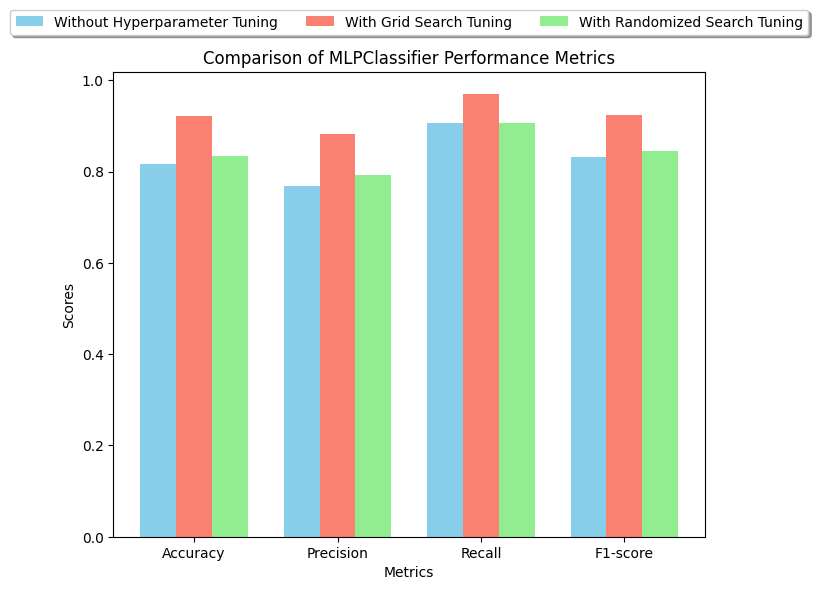

In [ ]:
import matplotlib.pyplot as plt

# Data for MLPClassifier
mlp_metrics_without_tuning = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

mlp_metrics_with_grid_search = {
    'Accuracy': accuracy_mlp_grid,
    'Precision': precision_mlp_grid,
    'Recall': recall_mlp_grid,
    'F1-score': f1_mlp_grid
}

mlp_metrics_with_random_search = {
    'Accuracy': accuracy_mlp_random,
    'Precision': precision_mlp_random,
    'Recall': recall_mlp_random,
    'F1-score': f1_mlp_random
}

# Plot settings
labels = list(mlp_metrics_without_tuning.keys())
x = range(len(labels))
plt.figure(figsize=(8, 6))
bar_width = 0.25

# Title
plt.title('Comparison of MLPClassifier Performance Metrics')

# Bar chart for MLPClassifier without tuning
plt.bar(x, list(mlp_metrics_without_tuning.values()), width=bar_width, label='Without Hyperparameter Tuning', color='skyblue', align='center')

# Bar chart for MLPClassifier with grid search tuning
plt.bar([i + bar_width for i in x], list(mlp_metrics_with_grid_search.values()), width=bar_width, label='With Grid Search Tuning', color='salmon', align='center')

# Bar chart for MLPClassifier with randomized search tuning
plt.bar([i + 2*bar_width for i in x], list(mlp_metrics_with_random_search.values()), width=bar_width, label='With Randomized Search Tuning', color='lightgreen', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks([i + bar_width for i in x], labels)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3)

plt.tight_layout()
plt.show()
